In [5]:
import geopandas
import contextily as cx

Could look at: 2020 data vs 2021 data? Boro by boro? GHG emissions vs EUI? Building type contributions to GHG? fuel type contributions to GHG? Fuel types by usage types? Combo high EUI and high ghg emissions areas/neighborhoods?

Map with top 10 GHG emitters per boro? What percent of that boros emissions do they make up?

Who is still using fuel oil?

building usage types with highest GHG emissions?

What to do with suspicious EUIs

Which usage types saw greatest decrease in emissions from 2019 to 2020?

Do i want to include population of each borough? I feel like no since commuting makes it not really accurate

What kinds of buildings are the biggest green power producers? Could city focus on those to generate more green power?

suggestion to the city-- data inputting form should check for impossible EUIs to get better data.

Correlation bt borough and EUI, prop type and EUI, buildings that are producing energy, how much do they use vs produce?



I think my question overall is: How can data be used to inform NYC's energy strategy to reach it's goal of carbon neutrality by 2050? Can I identify large areas for improvement?

In [1]:
!head LL84_2020.csv

Property Id,Property Name,Parent Property Id,Parent Property Name,Year Ending,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,Postcode,Primary Property Type - Self Selected,Primary Property Type - Portfolio Manager-Calculated,National Median Reference Property Type,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Construction Status,Number of Buildings,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,National Median ENERGY STAR Score,Target ENERGY STAR Score,Reason(s) for No Score,ENERGY STAR Certification - Year(s) Certified (Score),ENERGY STAR Certification - Eligibility,ENERGY STAR Certification - Last Approval Date,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),

In [14]:
#imports
import pandas as pd
import numpy as np
import plotly
from matplotlib import pyplot as plt
plt.style.use('ggplot')

Import data from CSVs

In [67]:
col_of_interest = ["Property Id", "Address 1", "Postcode","Primary Property Type - Self Selected",\
                   "Year Built", "Site EUI (kBtu/ft²)", "Site Energy Use (kBtu)",\
                   "Green Power - Onsite (kWh)","Total GHG Emissions (Metric Tons CO2e)", "Borough",\
                   'Largest Property Use Type - Gross Floor Area (ft²)',\
                   '2nd Largest Property Use - Gross Floor Area (ft²)',\
                   '3rd Largest Property Use Type - Gross Floor Area (ft²)','Latitude','Longitude',\
                   'Green Power - Offsite (kWh)','Green Power - Onsite and Offsite (kWh)']



data2020 = pd.read_csv('Data_2020.csv', usecols = col_of_interest, dtype = {"Address 1": str, \
                                                                          }, na_values = ["Not Available"])

data2019 = pd.read_csv('Data_2019.csv', usecols = col_of_interest, dtype = {"Address 1": str, \
                                                                          }, na_values = ["Not Available"])
#deal with annoying column names
#deal with annoying missing things and assign data types

/var/folders/8p/6k3vrp795231q_pwy6nvxz5w0000gn/T/ipykernel_93878/1753982443.py:11: DtypeWarning:

Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.

/var/folders/8p/6k3vrp795231q_pwy6nvxz5w0000gn/T/ipykernel_93878/1753982443.py:14: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.



Calculate total GSF

In [68]:
data2020['GSF'] = np.nansum([data2020['3rd Largest Property Use Type - Gross Floor Area (ft²)'],\
data2020['2nd Largest Property Use - Gross Floor Area (ft²)'],\
data2020['Largest Property Use Type - Gross Floor Area (ft²)']], axis = 0)




data2020 = data2020.drop(['Largest Property Use Type - Gross Floor Area (ft²)',\
               '2nd Largest Property Use - Gross Floor Area (ft²)',\
               '3rd Largest Property Use Type - Gross Floor Area (ft²)'], axis = 1)



In [69]:
data2019['GSF'] = np.nansum([data2019['3rd Largest Property Use Type - Gross Floor Area (ft²)'],\
data2019['2nd Largest Property Use - Gross Floor Area (ft²)'],\
data2019['Largest Property Use Type - Gross Floor Area (ft²)']], axis = 0)

data2019 = data2019.drop(['Largest Property Use Type - Gross Floor Area (ft²)',\
               '2nd Largest Property Use - Gross Floor Area (ft²)',\
               '3rd Largest Property Use Type - Gross Floor Area (ft²)'], axis = 1)



Exploration of onsite Green Power Generation-- current and potential

In [81]:
#Just wanted to see what offsite green power was like and make sure the onsite and offsite column was just a sum
#of on and offsite.

data2019[(data2019['Green Power - Onsite (kWh)'] > 0) | (data2019['Green Power - Onsite and Offsite (kWh)'] >0)]\
.sort_values('Green Power - Offsite (kWh)', ascending = False).head(10)

,Property Id,Address 1,Postcode,Primary Property Type - Self Selected,Year Built,Site EUI (kBtu/ft²),Site Energy Use (kBtu),Green Power - Onsite (kWh),Green Power - Offsite (kWh),Green Power - Onsite and Offsite (kWh),Total GHG Emissions (Metric Tons CO2e),Borough,Latitude,Longitude,GSF
985,1755636,120-01 Roosevelt Ave.,11368,Stadium (Open),2009,89.2,110727194.5,NaN,21929400.0,21929400.0,8243.8,QUEENS,40.754703,-73.845398,1241443.0
5744,2834707,787 Seventh Avenue,10019,Office,1983,100.1,181323348.0,NaN,9989737.0,9989737.0,14326.4,MANHATTAN,40.761955,-73.982622,1801054.0
980,1719778,24-01 44th Road,11101,Office,2005,67.7,18639751.5,NaN,3702250.0,3702250.0,1388.9,QUEENS,40.748206,-73.943731,275252.0
21686,6770921,150 Central Park South,10019,Multifamily Housing,1931,55.4,29052843.6,NaN,2885090.0,2885090.0,1854.0,MANHATTAN,40.766346,-73.977842,524199.0
10432,4593574,224 West 57th St,10019,Office,1909,57.4,9722937.1,NaN,1691071.0,1691071.0,745.9,MANHATTAN,40.765949,-73.981073,169416.0
2664,2665684,815 Second Avenue,10017,Office,1962,59.1,8259472.7,NaN,1039794.0,1039794.0,631.8,MANHATTAN,40.750856,-73.971466,139824.0
2419,2660703,129 Pierrepont Street,11201,K-12 School,1906,74.1,8022878.5,NaN,520425.0,520425.0,518.0,BROOKLYN,40.695034,-73.992380,108243.0
24496,7522770,263 W 86th St,10024-3103,Worship Facility,1897,92.1,3684190.7,NaN,291234.2,291234.2,227.1,NaN,NaN,NaN,40000.0
15374,6292562,55 Water Street,11201,Office,1972,138.6,60750329.2,NaN,150900.0,150900.0,4375.5,BROOKLYN,40.703301,-73.992047,438317.0
5852,2921187,153 Pierrepont Street,11201,K-12 School,2004,83.2,2663629.3,NaN,132200.0,132200.0,167.0,BROOKLYN,40.694699,-73.991169,32000.0


Ok what I'm doing below is finding out what property types generated green power in 2020, and what their average rate of kWh per square foot 

In [245]:
# sites_w_green2020 = data2020[['Green Power - Onsite (kWh)']].dropna(axis = 0, how = 'any')
green_power_sites_2020 = data2020[data2020['Green Power - Onsite (kWh)'] > 0]

prop_type_green_pow = green_power_sites_2020.groupby('Primary Property Type - Self Selected').agg('sum')\
[['Green Power - Onsite (kWh)','GSF']].sort_values(['Green Power - Onsite (kWh)'], ascending = False)

prop_type_green_pow['kWh/SF']= prop_type_green_pow['Green Power - Onsite (kWh)']/prop_type_green_pow['GSF']

prop_type_counts = green_power_sites_2020.groupby('Primary Property Type - Self Selected')[['Green Power - Onsite (kWh)']].agg('count')#\
prop_type_counts.columns = ['Count']

selected_prop_types = pd.concat([prop_type_green_pow, prop_type_counts], axis = 1)

selected_prop_types = selected_prop_types[selected_prop_types['Count'] >= 3]

selected_prop_types


,Green Power - Onsite (kWh),GSF,kWh/SF,Count
Primary Property Type - Self Selected,,,,
K-12 School,137759243.1,7614799.0,18.090989,32
Multifamily Housing,6121431.0,16000633.0,0.382574,33
Distribution Center,1605232.7,381188.0,4.211131,5
Retail Store,1277660.0,638000.0,2.002602,3
Manufacturing/Industrial Plant,306094.5,628763.0,0.486820,4


Wow there are only 86 sites producing green energy according to this. Would be interesting how much sqft this makes up of all the buildings of that type. How much green energy potential does the city have if all the buildings of the same type were to produce green power at the same rate/sqft? A weakness of this is that I don't have a ton of data points for each category, besides schools and multifamily housing.

What I've found here: the kWh/GSF able to be generated for five different primary property types. These were the primary property types that had at least 3 instances of a building with green power generation. The good thing is, multifamily housing and k12 schools are two of the top 3 primary prop types by GSF in the data.

Here I extrapolate the kwh/sf to all buildings of those five property types with enough data points for green power generation

In [16]:
GSF_by_prop_type = data2020.groupby('Primary Property Type - Self Selected').agg('sum')[['GSF']]\
.sort_values(['GSF'], ascending = False)

GSF_by_prop_type.columns = ['Citywide GSF']

projected_green_pow = pd.concat([GSF_by_prop_type, selected_prop_types], join = 'inner', axis = 1)

projected_green_pow['Green Power Gen Potential (kWh)'] = projected_green_pow['kWh/GSF']*projected_green_pow['Citywide GSF']

projected_green_pow

round(projected_green_pow['Green Power Gen Potential (kWh)'].agg('sum')/1000000000,3)

4.26

Citywide electricity use was 52.5 TWh in 2019, so calculating the percent of total

In [17]:
4.26/52.5

0.08114285714285714

So according to my calculations above, if green power were to be generated from the five property types at the same rate for all the buildings of that type included in the data set, NYC could generate 4.26 Terawatt hrs per year, which according to this website, is about 8% of NYC's electricity use. Which is not a huge amount but a lot more than we're getting from green sources now!

https://www.buildingcongress.com/advocacy-and-reports/reports-and-analysis/Electricity-Outlook-2017-Powering-New-York-Citys-Future/The-Electricity-Outlook-to-2027.html#:~:text=Annual%20energy%20consumption%20in%20New,year%20over%20the%20forecast%20period.

In [251]:
#only showing top five because the other property types had so little onsite generation
import plotly.express as px
fig = px.bar(prop_type_green_pow.iloc[0:5,], y ='Green Power - Onsite (kWh)', x = prop_type_green_pow.index[0:5],\
             title='Green Power Generators by Property Type')
fig.show()

In [252]:
#same number of sites in 2019. Hm. Guess I could have used 2019 to stay consistent, but I figured there could have been
#buildings with new green power sources added in 2020.
data2019[data2019['Green Power - Onsite (kWh)'] > 0]

,Property Id,Address 1,Postcode,Primary Property Type - Self Selected,Year Built,Site EUI (kBtu/ft²),Site Energy Use (kBtu),Green Power - Onsite (kWh),Green Power - Offsite (kWh),Green Power - Onsite and Offsite (kWh),Total GHG Emissions (Metric Tons CO2e),Borough,Latitude,Longitude,GSF
125,1633020,2545 Gunther Avenue,10469,K-12 School,1965,48.0,9057062.0,182039.9,0.0,182039.9,630.8,BRONX,40.863735,-73.836070,188575.0
129,1633028,111 Columbia Street,10002,K-12 School,1958,44.8,8112060.7,104569.1,0.0,104569.1,547.0,MANHATTAN,40.718895,-73.979308,181200.0
143,1633056,145 West 84th Street,10024,K-12 School,1965,48.9,15204137.8,48868.7,0.0,48868.7,1156.0,MANHATTAN,40.785803,-73.974614,311000.0
214,1633201,121-10 Rockaway Boulevard,11420,K-12 School,1973,63.5,15924602.1,155011.5,0.0,155011.5,963.8,QUEENS,40.675771,-73.816938,250800.0
261,1633296,3000 East Tremont Avenue,10461,K-12 School,1967,83.7,35022116.2,309764.5,0.0,309764.5,2045.7,BRONX,40.840702,-73.838545,418550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26459,10536715,112 Richmond Hill Road,10314,Retail Store,1975,47.0,2226052.5,445112.0,0.0,445112.0,56.2,STATEN IS,40.584301,-74.164907,47357.0
26720,10756385,100 Richmond Hill Road,10314,Retail Store,1975,70.9,19252114.5,470387.0,0.0,470387.0,1105.1,STATEN IS,40.587323,-74.164789,271643.0
26874,10821839,1102 Atlantic Avenue,11238,Manufacturing/Industrial Plant,1929,33.3,1496259.9,65794.0,0.0,65794.0,101.5,BROOKLYN,40.679518,-73.956819,44923.0
27566,11585842,333 Stanley Avenue,11207,Distribution Center,1958,72.0,2880575.4,56160.0,NaN,56160.0,142.8,BROOKLYN,40.654359,-73.895531,40000.0


Ok here I start to look at goruping GHG emissions by borough, and how do they change from 2019 to 2020. This is also where I noticed that there was an outlier in the 2020 data adding 4 million tons of co2 from a single building, which is not really possible. maybe if you are literally a coal burning power plant.

In [254]:
data2020.groupby(['Borough'])[['Total GHG Emissions (Metric Tons CO2e)']].sum()

,Total GHG Emissions (Metric Tons CO2e)
Borough,
BRONX,6669110.9
BROOKLYN,2995492.6
MANHATTAN,8969144.0
QUEENS,2557647.0
STATEN IS,412257.3


In [255]:
type(data2020["Total GHG Emissions (Metric Tons CO2e)"][0])

numpy.float64

In [256]:
data2019.groupby(['Borough'])[['Total GHG Emissions (Metric Tons CO2e)']].sum()

,Total GHG Emissions (Metric Tons CO2e)
Borough,
BRONX,2798239.2
BROOKLYN,3471987.0
MANHATTAN,11694356.2
QUEENS,3136121.8
STATEN IS,501618.1


In [261]:
comparison = pd.concat([data2019.groupby(['Borough'])[['Total GHG Emissions (Metric Tons CO2e)']].sum(),\
       data2020.groupby(['Borough'])[['Total GHG Emissions (Metric Tons CO2e)']].sum()], axis = 1)

# comparison['Percent_Change'] = comparison[[1]]-comparison[[2]]

comparison.columns = ['2019_MTCO2e','2020_MTCO2e']
comparison['Percent_Change'] = 100*(comparison['2020_MTCO2e'] - comparison['2019_MTCO2e'])/comparison['2019_MTCO2e']

comparison
#this makes me suspicious of bronx data

,2019_MTCO2e,2020_MTCO2e,Percent_Change
Borough,,,
BRONX,2798239.2,2418587.6,-13.567518
BROOKLYN,3471987.0,2995492.6,-13.723968
MANHATTAN,11694356.2,8969144.0,-23.303653
QUEENS,3136121.8,2557647.0,-18.445546
STATEN IS,501618.1,412257.3,-17.814509


In [262]:
#looking at bronx

bronx2020 = data2020[data2020['Borough'] == "BRONX"]
bronx2020.sort_values(['Total GHG Emissions (Metric Tons CO2e)'], ascending = False)
#Aha. somebody got their data way wrong. 4 million tons co2e from a senior care community. Should def remove this one.
#fill in from 2019 data?

,Property Id,Address 1,Postcode,Primary Property Type - Self Selected,Year Built,Site EUI (kBtu/ft²),Site Energy Use (kBtu),Green Power - Onsite (kWh),Green Power - Offsite (kWh),Green Power - Onsite and Offsite (kWh),Total GHG Emissions (Metric Tons CO2e),Borough,Longitude,Latitude,GSF
11366,5949517,2020 East Tremont Avenue,10462,Multifamily Housing,1939,383.4,923739605.4,NaN,0.0,0.0,50433.3,BRONX,-73.859406,40.841773,2409161.0
24767,12049536,1980-2040 East Tremont Avenue,10462,Multifamily Housing,1939,367.2,923701311.5,NaN,0.0,0.0,50430.3,BRONX,-73.860328,40.841667,2808161.0
27541,16087623,2000 East Tremont Avenue,10462,Multifamily Housing,1941,94.7,834086453.4,NaN,0.0,0.0,48051.9,BRONX,-73.859790,40.841727,8850612.0
2991,2698145,1300 Morris Park Avenue,10461,Other,1954,524.7,683714792.5,NaN,NaN,NaN,40674.7,BRONX,-73.844823,40.851182,1303020.0
25155,12347163,1400 Pelham Pkwy South,10461,Hospital (General Medical & Surgical),1957,229.2,390804111.7,NaN,0.0,0.0,24984.8,BRONX,-73.847079,40.857427,1704968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25518,12899134,1190 LONGWOOD AVE.,10474,Manufacturing/Industrial Plant,1950,NaN,NaN,NaN,NaN,NaN,NaN,BRONX,-73.891232,40.813344,33000.0
25645,13294622,2197 Cruger Avenue,10462,Multifamily Housing,1928,NaN,NaN,NaN,NaN,NaN,NaN,BRONX,-73.866649,40.856265,70296.0
27545,16089230,695 E139th Street,10454,Multifamily Housing,1969,NaN,NaN,NaN,NaN,NaN,NaN,BRONX,-73.913246,40.805922,12849.0
27569,16089942,560 E144th Street,10454,Multifamily Housing,1970,NaN,NaN,NaN,NaN,NaN,NaN,BRONX,-73.915035,40.811048,7308.0


In [263]:
#what was this outlier property's data in 2019?
data2019[data2019['Property Id'] == 6720128]

,Property Id,Address 1,Postcode,Primary Property Type - Self Selected,Year Built,Site EUI (kBtu/ft²),Site Energy Use (kBtu),Green Power - Onsite (kWh),Green Power - Offsite (kWh),Green Power - Onsite and Offsite (kWh),Total GHG Emissions (Metric Tons CO2e),Borough,Latitude,Longitude,GSF
21360,6720128,2175 Quarry Road,10457,Senior Care Community,1943,487.1,205180526.3,NaN,0.0,0.0,12611.5,BRONX,40.852341,-73.890409,421234.0


In [264]:
#remove outlier property
data2020 = data2020.loc[data2020['Property Id'] != 6720128]

           2019_MTCO2e  2020_MTCO2e  Percent_Change
Borough                                            
BRONX        2798239.2    2418587.6      -13.567518
BROOKLYN     3471987.0    2995492.6      -13.723968
MANHATTAN   11694356.2    8969144.0      -23.303653
QUEENS       3136121.8    2557647.0      -18.445546
STATEN IS     501618.1     412257.3      -17.814509


Text(0.5, 1.0, 'Greenhouse Gas Emissions from Buildings by Borough, 2019 vs. 2020')

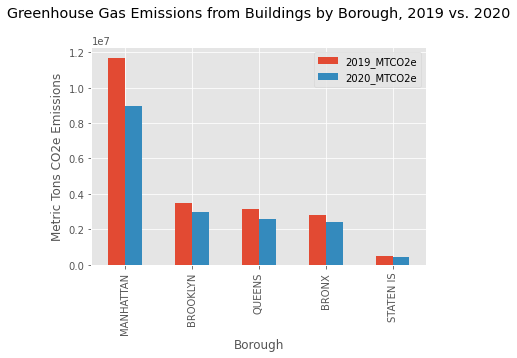

In [265]:
#Now this table is more realistic after removing the bronx outlier value.
comparison = pd.concat([data2019.groupby(['Borough'])[['Total GHG Emissions (Metric Tons CO2e)']].sum(),\
       data2020.groupby(['Borough'])[['Total GHG Emissions (Metric Tons CO2e)']].sum()], axis = 1)

# comparison['Percent_Change'] = comparison[[1]]-comparison[[2]]

comparison.columns = ['2019_MTCO2e','2020_MTCO2e']
comparison['Percent_Change'] = 100*(comparison['2020_MTCO2e'] - comparison['2019_MTCO2e'])/comparison['2019_MTCO2e']

print(comparison)

comparison.sort_values(['2019_MTCO2e'], ascending = False)[['2019_MTCO2e','2020_MTCO2e']].plot(kind= 'bar')
plt.ylabel('Metric Tons CO2e Emissions')
plt.title('Greenhouse Gas Emissions from Buildings by Borough, 2019 vs. 2020', pad = 30)

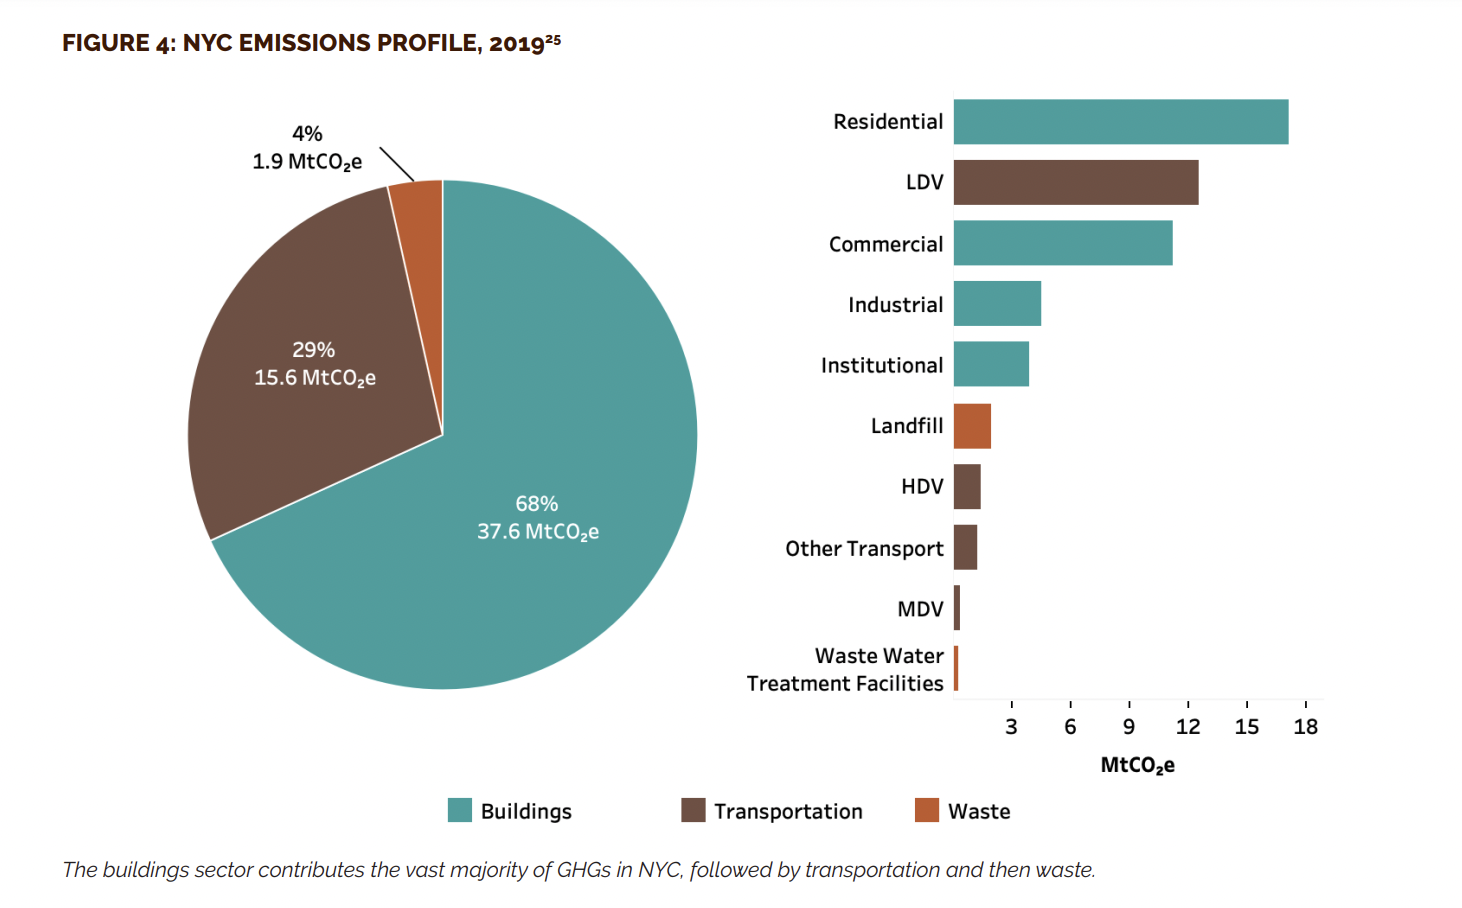

https://www1.nyc.gov/assets/sustainability/downloads/pdf/publications/Carbon-Neutral-NYC.pdf

In [28]:
#percent of buildings in NYC included in the data
print(len(data2019)/1000000*100)

#percent of emissions made up by buildings in the data compared to all buildings in the city

((data2019['Total GHG Emissions (Metric Tons CO2e)'].agg('sum')/1000000)/37.6)*100


2.9084


61.02271542553191

Each borough saw a decrease in GHG emissions from 2019 to 2020, likely due to changes in occupancy and operation during the early part of the COVID-19 pandemic. Manhattan saw the greatest decrease, with 23% lower emissions in 2020. The Bronx and Brooklyn saw the smallest decrease, with about 13.5% lower emissions in 2020. 2021 data is not yet available, but it will be interesting to see if any of the GHG emission decreases were permanent, or if they returned to normal levels in 2021.


In [266]:
#looking at Manhattan

manhattan2020 = data2020[data2020['Borough'] == 'MANHATTAN']
manhattan2020.sort_values(['Total GHG Emissions (Metric Tons CO2e)'], ascending = False).head(15)

,Property Id,Address 1,Postcode,Primary Property Type - Self Selected,Year Built,Site EUI (kBtu/ft²),Site Energy Use (kBtu),Green Power - Onsite (kWh),Green Power - Offsite (kWh),Green Power - Onsite and Offsite (kWh),Total GHG Emissions (Metric Tons CO2e),Borough,Longitude,Latitude,GSF
7117,3616399,70 Washington Square South,10012,Mixed Use Property,1833,201.0,1.386890e+09,NaN,0.0,0.0,78844.2,MANHATTAN,-73.997027,40.729766,5990300.0
9115,4452255,550 First Avenue,10016,Hospital (General Medical & Surgical),1952,353.2,1.250287e+09,NaN,0.0,0.0,73126.4,MANHATTAN,-73.974594,40.742293,3540298.0
7983,4143131,522 First Avenue,10016,Laboratory,2006,4530.8,1.178089e+09,NaN,0.0,0.0,67510.9,MANHATTAN,-73.975172,40.741492,260016.0
5003,2826188,251 Mercer Street,10012,College/University,1966,6841.7,1.220034e+09,NaN,0.0,0.0,66091.7,MANHATTAN,-73.995414,40.728413,178324.0
27896,16828455,31 W 34 St,10001,Office,1912,3586.8,9.885525e+08,NaN,0.0,0.0,65718.5,MANHATTAN,-73.986480,40.749256,275609.0
1965,2658585,530 West 120th Street,10027,College/University,1988,4522.6,9.949322e+08,NaN,0.0,0.0,56204.4,MANHATTAN,-73.960217,40.809752,219993.0
1138,2364110,Rockefeller Center,10111,Office,1939,83.4,6.853902e+08,NaN,0.0,0.0,50985.7,MANHATTAN,-73.977844,40.759268,8165165.0
6,28402,525 East 68th Street,10021,Hospital (General Medical & Surgical),1932,379.3,1.062846e+09,NaN,0.0,0.0,50765.6,MANHATTAN,-73.955251,40.764149,2801795.0
25159,12347167,462 1st Ave,10016,Hospital (General Medical & Surgical),1968,201.0,6.751526e+08,NaN,0.0,0.0,48336.2,MANHATTAN,-73.976624,40.739497,3359764.0
21844,7536925,111 8th Avenue,10011,Office,1932,246.5,5.759197e+08,NaN,0.0,0.0,45247.6,MANHATTAN,-74.001844,40.740704,2310515.0


Here I started thinking about cleaning the data more for a comparison of EUIs. EUIs in the thousands of kbtu/sf are extremely uncommon. I chose 2000 kbtu/sf as a cutoff -- only looked at values under that.

Text(0, 0.5, 'EUI')

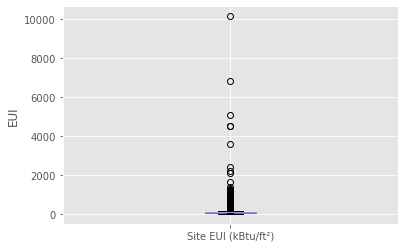

In [271]:
# plt.hist(manhattan2020['Site EUI (kBtu/ft²)'])
data2020[['Site EUI (kBtu/ft²)']].boxplot()
plt.ylabel('EUI')

#still have some big outliers but not as bad as before.

#cutoff is 2000 or some no of stds from the mean???

In [272]:
data2020.sort_values(['Site EUI (kBtu/ft²)'], ascending = False)
#Hm. I guess energy/power station makes sense to have high energy use?


,Property Id,Address 1,Postcode,Primary Property Type - Self Selected,Year Built,Site EUI (kBtu/ft²),Site Energy Use (kBtu),Green Power - Onsite (kWh),Green Power - Offsite (kWh),Green Power - Onsite and Offsite (kWh),Total GHG Emissions (Metric Tons CO2e),Borough,Longitude,Latitude,GSF
11101,5863726,2701 WEST 6 ST,11224,Energy/Power Station,1965,10164.9,6.464850e+08,NaN,NaN,NaN,34337.9,BROOKLYN,-73.974494,40.581696,63600.0
5003,2826188,251 Mercer Street,10012,College/University,1966,6841.7,1.220034e+09,NaN,0.0,0.0,66091.7,MANHATTAN,-73.995414,40.728413,178324.0
22413,8726877,4435 Victory Boulevard,10314,Manufacturing/Industrial Plant,1996,5101.0,2.236953e+09,NaN,0.0,0.0,132207.6,STATEN IS,-74.200825,40.586217,438530.0
7983,4143131,522 First Avenue,10016,Laboratory,2006,4530.8,1.178089e+09,NaN,0.0,0.0,67510.9,MANHATTAN,-73.975172,40.741492,260016.0
1965,2658585,530 West 120th Street,10027,College/University,1988,4522.6,9.949322e+08,NaN,0.0,0.0,56204.4,MANHATTAN,-73.960217,40.809752,219993.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28051,16897277,1266 Olmstead Avenue,10462,Multifamily Housing,1928,NaN,NaN,NaN,NaN,NaN,0.0,BRONX,-73.854481,40.833200,126054.0
28054,16897295,1266 Olmstead Avenue,10462,Multifamily Housing,1928,NaN,NaN,NaN,NaN,NaN,0.0,BRONX,-73.854481,40.833200,126054.0
28063,17298485,110-31 Merrick Boulevard,11433,Worship Facility,1997,NaN,NaN,NaN,NaN,NaN,0.0,QUEENS,-73.782002,40.695127,32017.0
28064,17298486,110-31A Merrick Boulevard,11433,Worship Facility,1997,NaN,NaN,NaN,NaN,NaN,0.0,QUEENS,-73.782002,40.695127,41756.0


(28066, 15)
(27218, 15)


Text(0, 0.5, 'EUI')

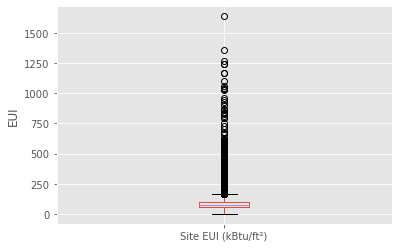

In [273]:
print(data2020.shape)

print(data2020[data2020['Site EUI (kBtu/ft²)'] <= 2000].shape)

#so removing rows where the EUI is above 2000 only removes about 800 records.

data2020[data2020['Site EUI (kBtu/ft²)'] <= 2000][['Site EUI (kBtu/ft²)']].boxplot()
plt.ylabel('EUI')

In [274]:
data2020[data2020['Site EUI (kBtu/ft²)'] <= 2000][['Site EUI (kBtu/ft²)']].describe()

,Site EUI (kBtu/ft²)
count,27218.000000
mean,81.527015
std,58.417535
min,0.000000
25%,54.300000
50%,75.400000
75%,97.300000
max,1638.100000


In [275]:
clean_data2020 = data2020[data2020['Site EUI (kBtu/ft²)'] <= 2000]
clean_data2019 = data2019[data2019['Site EUI (kBtu/ft²)'] <= 2000]
clean_data2020[['Year Built','Site EUI (kBtu/ft²)','Total GHG Emissions (Metric Tons CO2e)','GSF','Borough']].corr()

#Corr here doesn't really do anything interesting. Except that EUI, GHG don't seem to correlate with year built. How do I
#do a correlation of categorical variables? chi squared according to internet.

,Year Built,Site EUI (kBtu/ft²),Total GHG Emissions (Metric Tons CO2e),GSF
Year Built,1.000000,-0.056291,0.051961,0.086236
Site EUI (kBtu/ft²),-0.056291,1.000000,0.230813,0.028062
Total GHG Emissions (Metric Tons CO2e),0.051961,0.230813,1.000000,0.817046
GSF,0.086236,0.028062,0.817046,1.000000


In [276]:
clean_data2020

,Property Id,Address 1,Postcode,Primary Property Type - Self Selected,Year Built,Site EUI (kBtu/ft²),Site Energy Use (kBtu),Green Power - Onsite (kWh),Green Power - Offsite (kWh),Green Power - Onsite and Offsite (kWh),Total GHG Emissions (Metric Tons CO2e),Borough,Longitude,Latitude,GSF
0,7365,1155 Avenue of the Americas,10036,Office,1982,41.7,28621509.3,NaN,0.0,0.0,2190.6,MANHATTAN,-73.982826,40.756631,686838.0
1,8139,200 East 42nd St.,10017,Office,1956,234.9,90318696.0,NaN,0.0,0.0,6184.2,MANHATTAN,-73.974306,40.750698,384432.0
2,8604,114 West 47th st,10036,Financial Office,1989,56.0,32329714.8,NaN,0.0,0.0,2407.5,MANHATTAN,-73.982504,40.758310,577534.0
3,8841,733 Third Avenue,10017,Office,1961,70.4,27516842.6,NaN,0.0,0.0,2003.9,MANHATTAN,-73.972753,40.753074,390878.0
4,11809,4 Times Square,10036,Office,1999,78.7,126054250.5,NaN,0.0,0.0,8976.8,MANHATTAN,-73.986244,40.756181,1601977.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28059,17051715,820 39 Street,11232,Hotel,1984,95.2,2453403.5,NaN,0.0,0.0,154.8,BROOKLYN,-73.996663,40.646877,25781.0
28060,17248794,120-11 109 Avenue,11420,Multifamily Housing,1942,132.3,3835395.8,NaN,0.0,0.0,216.1,QUEENS,-73.821113,40.682566,29000.0
28061,17283996,3053 Villa Avenue,10468,Multifamily Housing,2020,1.4,43986.5,NaN,0.0,0.0,3.5,BRONX,-73.888230,40.873648,31396.0
28062,17286197,109 W 129th St,10027,Senior Living Community,1920,117.3,3088625.0,NaN,0.0,0.0,184.0,MANHATTAN,-73.944249,40.810588,26324.0


In [277]:
clean_data2019

,Property Id,Address 1,Postcode,Primary Property Type - Self Selected,Year Built,Site EUI (kBtu/ft²),Site Energy Use (kBtu),Green Power - Onsite (kWh),Green Power - Offsite (kWh),Green Power - Onsite and Offsite (kWh),Total GHG Emissions (Metric Tons CO2e),Borough,Latitude,Longitude,GSF
0,7365,1155 Avenue of the Americas,10036,Office,1982,50.1,34344218.3,NaN,0.0,0.0,2747.2,MANHATTAN,40.756631,-73.982826,684986.0
1,8139,200 East 42nd St.,10017,Office,1956,95.2,36613879.7,NaN,0.0,0.0,2752.2,MANHATTAN,40.750698,-73.974306,384432.0
2,8604,114 West 47th st,10036,Financial Office,1989,67.4,38939555.8,NaN,0.0,0.0,3038.1,MANHATTAN,40.758310,-73.982504,577534.0
3,8841,733 Third Avenue,10017,Office,1961,99.4,39212617.0,NaN,0.0,0.0,2913.5,MANHATTAN,40.753074,-73.972753,394646.0
4,11809,4 Times Square,10036,Office,1999,100.2,160549289.2,NaN,0.0,0.0,12186.2,MANHATTAN,40.756181,-73.986244,1601977.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29077,14272571,720 Livonia Avenue,11207,K-12 School,1970,65.7,1840350.7,NaN,0.0,0.0,117.3,BROOKLYN,40.665283,-73.890432,28000.0
29078,14302311,5601 Foster Avenue,11234,Self-Storage Facility,2013,9.2,803082.4,NaN,0.0,0.0,63.8,BROOKLYN,40.637999,-73.922951,86902.0
29079,14308553,30-33 32 Street,11102,Multifamily Housing,1917,118.9,3328672.8,NaN,0.0,0.0,247.8,QUEENS,40.765550,-73.921363,28000.0
29080,14315113,82-16 34th Ave,11372,Multifamily Housing,1930,84.3,3533618.0,NaN,0.0,0.0,197.6,QUEENS,40.753750,-73.884789,41903.0


In [278]:
#Which borough has the highest average EUI? I think I should stick to 2019 data.
clean_data2019.groupby(['Borough']).agg('mean')[['Site EUI (kBtu/ft²)']]

,Site EUI (kBtu/ft²)
Borough,
BRONX,93.999886
BROOKLYN,83.169140
MANHATTAN,90.655705
QUEENS,90.172669
STATEN IS,95.270054


Text(0.5, 1.0, 'Top 10 Property Types contributing to GHG Emissions')

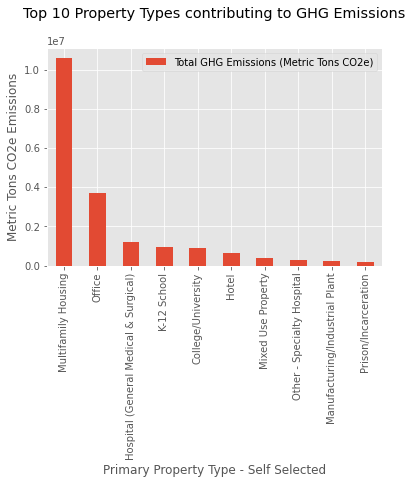

In [279]:
#which usage types contribute the most to GHG emissions

prop_type_ghg = clean_data2019.groupby(['Primary Property Type - Self Selected']).agg('sum')[['Total GHG Emissions (Metric Tons CO2e)']]\
.sort_values('Total GHG Emissions (Metric Tons CO2e)', ascending = False)

prop_type_ghg.iloc[0:10,].plot(kind= 'bar')
plt.ylabel('Metric Tons CO2e Emissions')
plt.title('Top 10 Property Types contributing to GHG Emissions', pad = 30)

From Energy Star website, here are the median Site EUIs for property types.
https://www.energystar.gov/buildings/benchmark/understand_metrics/what_eui

In [280]:
energy_star_medians = pd.read_csv('energy_star_median.csv', usecols = ['Property Type', 'Site EUI'])
energy_star_medians = energy_star_medians.set_index('Property Type')
# print(pd.unique(energy_star_medians.index))
# energy_star_medians.sort_values('Property Type')
# There was a duplicate value. I deleted in csv.

In [281]:
es_prop_types = list(energy_star_medians.index)

In [282]:
prop_type_eui = clean_data2019.groupby(['Primary Property Type - Self Selected']).agg('mean')\
[['Site EUI (kBtu/ft²)']].round(1)

In [283]:
# EUI_benchmark = pd.DataFrame([prop_type_eui.loc[prop_type] for prop_type in es_prop_types if\
#  prop_type in list(prop_type_eui.index)])
# #was checking to see how many of the property types between ES and my dataset match. 37 of them do, yay

In [284]:
EUI_benchmark = pd.concat([prop_type_eui, energy_star_medians], axis = 1, join = 'inner')

EUI_benchmark.columns = ['NYC Avg Site EUIs', 'Energy Star Avg Site EUIs']

EUI_benchmark['EUI Benchmark Percent Difference'] = round(100*(EUI_benchmark['NYC Avg Site EUIs'] - EUI_benchmark['Energy Star Avg Site EUIs'])\
/EUI_benchmark['Energy Star Avg Site EUIs'],1)

In [285]:
EUI_benchmark.sort_values('EUI Benchmark Percent Difference',  ascending = False)

,NYC Avg Site EUIs,Energy Star Avg Site EUIs,EUI Benchmark Percent Difference
Veterinary Office,270.0,64.5,318.6
Prison/Incarceration,258.7,69.9,270.1
Ambulatory Surgical Center,224.5,62.0,262.1
Laboratory,331.3,115.3,187.3
Mixed Use Property,111.2,40.1,177.3
Urgent Care/Clinic/Other Outpatient,160.5,64.5,148.8
Medical Office,127.3,51.2,148.6
Distribution Center,54.3,22.7,139.2
Non-Refrigerated Warehouse,52.4,22.7,130.8
Financial Office,111.8,52.9,111.3


Can I combine these results with the contributions to total GHG by each property type in NYC?

In [286]:
#total GHG emissions in 2019
GHG_total_2019 = prop_type_ghg.agg('sum')[0]

prop_type_ghg['Percent of Total GHG Emissions'] = round(100*prop_type_ghg['Total GHG Emissions (Metric Tons CO2e)']\
                                                        /GHG_total_2019, 1)

prop_type_ghg


,Total GHG Emissions (Metric Tons CO2e),Percent of Total GHG Emissions
Primary Property Type - Self Selected,,
Multifamily Housing,10597818.7,48.6
Office,3724819.1,17.1
Hospital (General Medical & Surgical),1199670.8,5.5
K-12 School,942445.5,4.3
College/University,898049.8,4.1
...,...,...
Single Family Home,515.3,0.0
Immeuble à logements multiples,281.6,0.0
Bar/Nightclub,269.7,0.0


In [287]:
decision_table = pd.concat([EUI_benchmark, prop_type_ghg], axis = 1, join = 'inner')

In [288]:
decision_table.sort_values('Percent of Total GHG Emissions', ascending = False).iloc[0:10,]

,NYC Avg Site EUIs,Energy Star Avg Site EUIs,EUI Benchmark Percent Difference,Total GHG Emissions (Metric Tons CO2e),Percent of Total GHG Emissions
Multifamily Housing,87.6,59.6,47.0,10597818.7,48.6
Office,83.5,52.9,57.8,3724819.1,17.1
Hospital (General Medical & Surgical),264.3,234.3,12.8,1199670.8,5.5
K-12 School,68.9,48.5,42.1,942445.5,4.3
College/University,120.1,84.3,42.5,898049.8,4.1
Hotel,115.5,63.0,83.3,645156.3,3.0
Mixed Use Property,111.2,40.1,177.3,367254.5,1.7
Retail Store,95.8,103.5,-7.4,201305.7,0.9
Financial Office,111.8,52.9,111.3,198835.6,0.9
Prison/Incarceration,258.7,69.9,270.1,205976.2,0.9
